# Machine Learning with scikit-learn

Originally created by Dr. [Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University

March 11, 2022

Scikit-learn is a software machine learning library for the Python programming language. It features:

* various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means, density-based spatial clustering of applications with noise (DBSCAN), etc.
* dimension reduction, feature extraction, normalization, etc.

Scikit-learn is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. Note that scikit-learn doesn't support GPU yet.

![sklearn](https://github.com/happidence1/AILabs/blob/master/images/sklearn.svg?raw=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## 1. Linear Regression 
Linear Regression is a statistical technique for estimating the relationships among variables and predicting a continuous-valued attribute associated with an object.
Linear Regression fits a linear model with coefficients  to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

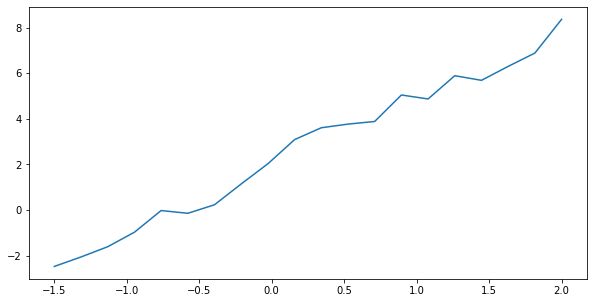

In [ ]:
# generate a data set
n_samples = 20
x = np.linspace(-1.5, 2.0, n_samples)[:, np.newaxis]
y = 3 * x + 2 + 0.5*np.random.randn(n_samples, 1)
plt.figure(figsize=(10,5))
plt.plot(x, y);

In [ ]:
x.shape

(20, 1)

In [ ]:
y.shape

(20, 1)

In [ ]:
model = LinearRegression()
# Fit linear model.
model.fit(x, y);

In [ ]:
# Estimated coefficients for the linear regression problem. 
# If multiple targets are passed during the fit (y 2D), 
# this is a 2D array of shape (n_targets, n_features), while 
# if only one target is passed, this is a 1D array of length n_features.
model.coef_

array([[2.96532967]])

In [ ]:
# Independent term in the linear model.
model.intercept_

array([1.93173773])

In [ ]:
# Returns the coefficient of determination R^2 of the prediction.
model.score(x, y)

0.9856015857044292

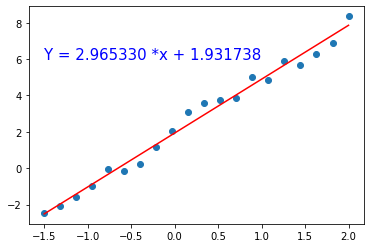

In [ ]:
# Plot the data and the model prediction
y_fit = model.predict(x)

# plot the original data set
plt.scatter(x, y)

# plot the bestfit line
plt.plot(x, y_fit, color='r');

# output text on the figure
plt.text(-1.5, 6, r"Y = %f *x + %f"%(model.coef_, model.intercept_), fontsize=15, color='b');

In [ ]:
# let's try polynomial fitting with the linear regression
x = np.linspace(-1.5, 2.0, n_samples)[:, np.newaxis]
y = 3 * x**4 + 2.5*x**2 + 4.7 * x + np.random.randn(n_samples, 1)

[[4.31985624 2.76434785 0.46313633 2.71629017]]


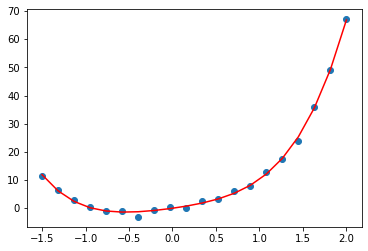

In [ ]:
x_poly = np.hstack([x, x**2, x**3, x**4])
model.fit(x_poly, y);
print(model.coef_)
y_pred = model.predict(x_poly)
plt.scatter(x, y);
plt.plot(x, y_pred, 'r');

In [ ]:
x_poly.shape

(20, 4)

In [ ]:
help(np.hstack)

Help on function hstack in module numpy:

hstack(tup)
    Stack arrays in sequence horizontally (column wise).
    
    This is equivalent to concatenation along the second axis, except for 1-D
    arrays where it concatenates along the first axis. Rebuilds arrays divided
    by `hsplit`.
    
    This function makes most sense for arrays with up to 3 dimensions. For
    instance, for pixel-data with a height (first axis), width (second axis),
    and r/g/b channels (third axis). The functions `concatenate`, `stack` and
    `block` provide more general stacking and concatenation operations.
    
    Parameters
    ----------
    tup : sequence of ndarrays
        The arrays must have the same shape along all but the second axis,
        except 1-D arrays which can be any length.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays.
    
    See Also
    --------
    concatenate : Join a sequence of arrays along an existing axis.
    s

## 2. Classification
Classification is to Identify to which category an object belongs to based on a training set of data containing observations (or instances) whose category membership is known.

Another way to think of classification is as a discrete form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

### 2.1 Classificaiton - SVM
Support-vector machines (SVMs), are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 

The primary task of an SVM algorithm is to find the vector/hyperplane that separates binary sets with the maximum margin to both classes.

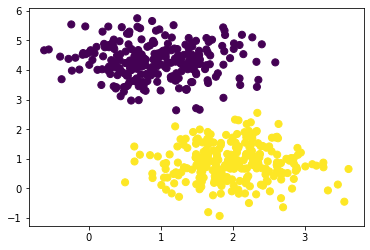

In [ ]:
from sklearn.datasets import make_blobs
n_samples = 500
x, y = make_blobs(n_samples=n_samples, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50);

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x, y);
w=clf.coef_[0]

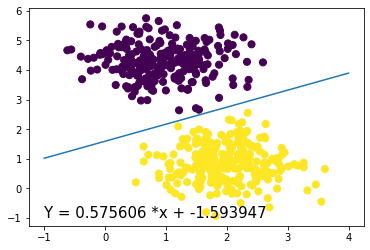

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50);
a = -w[0] / w[1]
b = (clf.intercept_[0]) / w[1]
x_fit  = np.linspace(-1, 4)
plt.plot(x_fit, a * x_fit - b)
plt.text(-1, -1, r"Y = %f *x + %f"%(a, b), fontsize=15);

### 2.2 Classificaiton - KNN Classifier
The K-Nearest Neighbors (KNN) algorithm is a method used for algorithm used for classification or for regression. In both cases, the input consists of the k closest training examples in the feature space. Given a new, unknown observation, look up which points have the closest features and assign the predominant class.

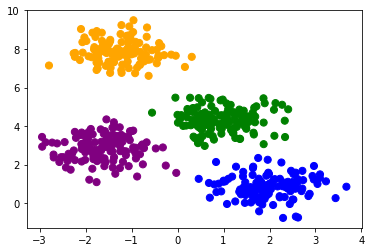

In [ ]:
from sklearn import neighbors
x, y = make_blobs(n_samples=n_samples, centers=4,
                  random_state=0, cluster_std=0.60)
colours = ['green', 'blue', 'purple', 'orange']
plt.scatter(x[:, 0], x[:, 1], c=[colours[i] for i in y], s=50);

In [ ]:
# create the model 
knn = neighbors.KNeighborsClassifier(n_neighbors=4, weights='uniform')

# fit the model with the blobs generated above.
knn.fit(x, y);

[0]


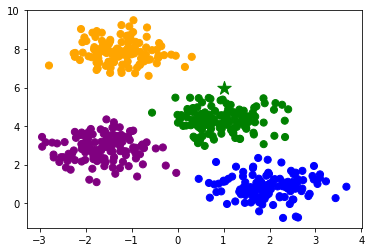

In [ ]:
x_pred = [1, 6]
# r = knn.predict([x_pred,])
r = knn.predict([x_pred])
# plt.scatter(x[:, 0], x[:, 1], c=(y==r[0]));
plt.scatter(x[:, 0], x[:, 1], c=[colours[i] for i in y], s=50);
# plt.scatter(x_pred[0], x_pred[1], c='red', s=50);
plt.scatter(x_pred[0], x_pred[1], c=colours[r[0]], marker='*', s=200);

print(r)

## 3. Clustering
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Common clustering algorithms include K-means, Density-based spatial clustering of applications with noise (DBSCAN) and mean-shift. 

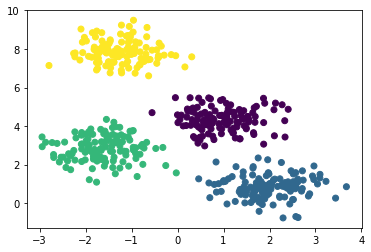

In [ ]:
# We will use the blobs crated above for clustering examples as well.
plt.scatter(x[:, 0], x[:, 1], c=y);

### 3.1 Clustering - K-Means
The K-Means algorithm searches for a predetermined number of clusters within an unlabeled multidimensional dataset.
The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers. K-Means clustering highly depends on the K clusters that is specified at the beginning. It works best when the number of clusters is known. 


In [ ]:
from sklearn.cluster import KMeans
x, y = make_blobs(n_samples=n_samples, centers=4,
                  random_state=0, cluster_std=1.0)
y_pred = KMeans(n_clusters=4).fit(x)
y_pred.cluster_centers_

array([[ 1.98473613,  0.77127554],
       [-1.24428679,  7.86364722],
       [-1.73282159,  2.79556356],
       [ 0.91618785,  4.35308658]])

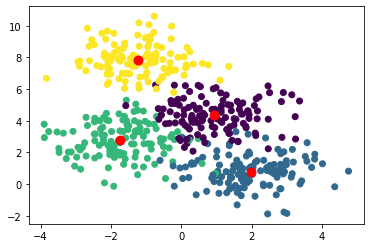

In [ ]:
# original classification
plt.scatter(x[:, 0], x[:, 1], c=y);
plt.scatter(y_pred.cluster_centers_[:, 0], y_pred.cluster_centers_[:, 1], c='r', s=80);

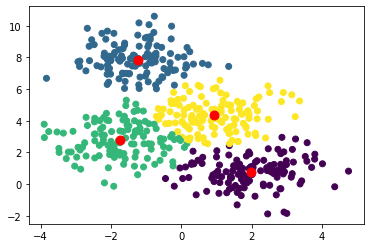

In [ ]:
# predicted clustering
plt.scatter(x[:, 0], x[:, 1], c=y_pred.predict(x));
plt.scatter(y_pred.cluster_centers_[:, 0], y_pred.cluster_centers_[:, 1], c='r', s=80);

### Additional Materials - Principal component analysis (PCA)
Principal component analysis (PCA) is a statistical procedure that converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. PCA is mostly used as a tool in exploratory data analysis and for making predictive models.

We will explore the Iris Data set again with scikit-learn, which contains a clean copy of the Iris data set.

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The below plot uses the first two features. See [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more information on this dataset.

![petal_sepal](https://github.com/happidence1/AILabs/blob/master/images/petal_sepal.jpg?raw=1)

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
iris_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.00,-0.12,0.87,0.82,0.78
sepal width (cm),-0.12,1.00,-0.43,-0.37,-0.43
petal length (cm),0.87,-0.43,1.00,0.96,0.95
petal width (cm),0.82,-0.37,0.96,1.00,0.96
target,0.78,-0.43,0.95,0.96,1.00


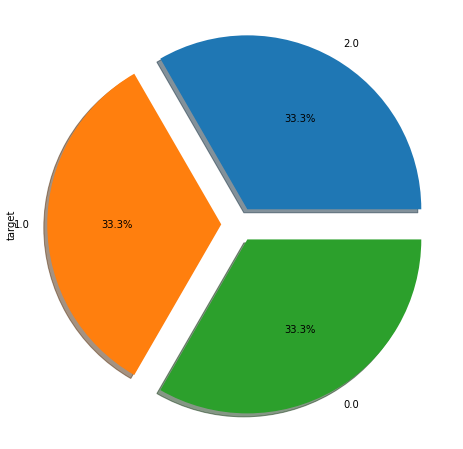

In [ ]:
iris_df['target'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))

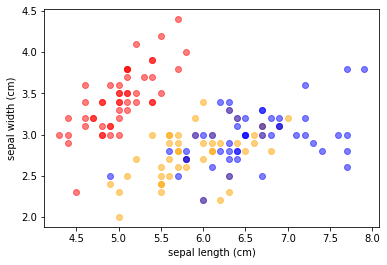

In [ ]:
colours = ['red', 'orange', 'blue']
species = ['I. setosa', 'I. versicolor', 'I. virginica']

# iterate through 3 species
for i in range(0, 3):    
    species_df = iris_df[iris_df['target'] == i]    
    plt.scatter(species_df['sepal length (cm)'],        
        species_df['sepal width (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i],
    )
plt.xlabel('sepal length (cm)');
plt.ylabel('sepal width (cm)');

In [ ]:
n_samples, n_features = iris.data.shape

print(iris.keys())
print((n_samples, n_features))
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)
print(iris.feature_names)
x, y = iris.data, iris.target

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
x.shape

(150, 4)

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


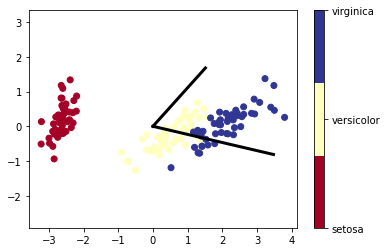

In [ ]:
print("Reduced dataset shape:", x_pca.shape)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3));
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.colorbar(ticks=[0, 1, 2], format=formatter)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 10 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)  
plt.axis('equal');

In [ ]:
# variance ratio of the components
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [ ]:
x.shape

(150, 4)

In [ ]:
x_pca.shape

(150, 2)